# PRMT-1181 Attachment Metadata Insights

### Context

PCSE want to be able to understand the scope and size of the GP2GP fallback service. They want to know more about the types of attachments that come via GP2GP.

They would like to know:
- Average and maximum file sizes
- Graph which demonstrates distribution of file sizes
- Identify File types that got as far as the transfer
- Add graph on number of attachments

### Requirements

In order to replicate this notebook, perform the following steps:

1. Log into Splunk and run the following query, for 21/12/2020 00:00:00:00 to 27/12/2020 24:00:00 and 28/12/2020 00:00:00:00 to 03/01/2020 24:00:00 time frames (currently there are issues with downloading large data sets in Splunk):

```
index="spine2vfmmonitor" logReference=MPS0208
| fields _time, attachmentID, conversationID, FromSystem, ToSystem, attachmentType, Compressed, ContentType, LargeAttachment, Length, OriginalBase64
| fields - _raw
```

2. Download the two data sets as CSVs and place in a directory. Set the `INPUT_DATA_DIR` environment variable to point to this directory.

In [5]:
import paths, os
import duckdb
from scripts.attachments import construct_attachments_db, query_attachment_statistics, query_attachment_statistics_by_content_type

In [2]:
attachment_data_dir = os.environ["INPUT_DATA_DIR"]
cursor =  duckdb.connect()
attachments = construct_attachments_db(cursor, attachment_data_dir)

## Average and maximum file sizes

In [3]:
attachments_stats = query_attachment_statistics(attachments)

attachments_stats.style.set_caption("Attachment file sizes (bytes)")
#TODO: ADD date range to table title

,total,smallest,quantile_25,median,quantile_75,largest
0,2502766,4,19248,52420,188546,203868820


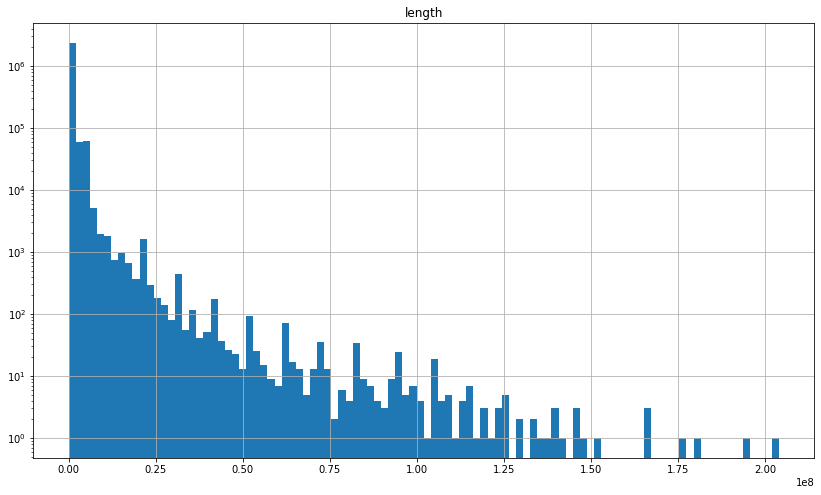

In [4]:
hist = attachments.project("length").df().hist(bins=100, log=True, figsize=(14,8))
#TODO: add sensible axis labels (e.g MB)

### By Attachment Content Type

In [6]:
attachment_statistics_by_content_type_df = query_attachment_statistics_by_content_type(attachments)
attachment_statistics_by_content_type_df.style.set_caption("Attachment file sizes (bytes)")

,content_type,total,smallest,quantile_25,median,quantile_75,largest
0,image/tiff,1200968,40.000000,39628.000000,74336.000000,368080.000000,203868820.000000
1,image/jpeg,54306,2312.000000,227882.000000,356386.000000,628018.000000,11576176.000000
2,application/msword,252386,12.000000,11016.000000,41012.000000,131720.000000,36285804.000000
3,image/png,116424,242.000000,31584.000000,46516.000000,115136.000000,30706124.000000
4,text/plain,120187,4.000000,224.000000,224.000000,232.000000,366584.000000
5,text/rtf,483741,4.000000,9256.000000,16396.000000,58288.000000,19053500.000000
6,application/octet-stream,47303,12.000000,3876.000000,5460.000000,28904.000000,27439536.000000
7,application/pdf,155701,1432.000000,59724.000000,182828.000000,350960.000000,193937412.000000
8,text/html,33053,8.000000,1296.000000,2028.000000,4860.000000,768250.000000
9,application/xml,31731,136.000000,3208.000000,4432.000000,9936.000000,2988864.000000
